# Typst Express Docs

In [15]:
from pathlib import Path
from IPython.display import display, Image
from math import radians
import bpy
def fresh_scene(keep_cube=False):
    bpy.ops.object.select_all(action='DESELECT')    
    
    # Delete all collections except "Collection"
    for collection in bpy.data.collections:
        if collection.name != "Collection":
            bpy.data.collections.remove(collection)
    
    # Select all objects except those in Collection
    for obj in bpy.context.scene.objects:
        if obj.users_collection[0].name != "Collection":
            obj.select_set(True)
    
    # Delete selected objects
    bpy.ops.object.delete()


def render_result():
    # Render the scene and save the result to the desktop
    path = Path.home() / 'Downloads'
    output_path = str(path / 'img.png')
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath=output_path)
    
    # Display the saved image
    display(Image(filename=output_path))

In [78]:
fresh_scene()

In [79]:
from typst_importer.curve_utils import get_curve_collection_bounds
from mathutils import Vector

def adjust_camera_to_collection(c, padding_factor=0.2):
    min_p, max_p = get_curve_collection_bounds(c)

    # Position camera to frame the object bounds
    center = (min_p + max_p) / 2
    size = max_p - min_p
    max_dim = max(size.x, size.y, size.z)

    # Add padding to ensure everything is visible
    padding = padding_factor * max_dim  # Default 20% padding on each side
    min_p = Vector((min_p.x - padding, min_p.y - padding, min_p.z - padding))
    max_p = Vector((max_p.x + padding, max_p.y + padding, max_p.z + padding))

    camera = bpy.data.objects['Camera']
    camera.location = (center.x, center.y, center.z + max_dim*2) # Position camera above
    camera.rotation_euler = (0, 0, 0) # Point camera straight down

    # Set orthographic camera to frame the content with extra padding
    bpy.context.scene.camera.data.type = 'ORTHO'
    bpy.context.scene.camera.data.ortho_scale = max_dim * 2.2 # Increased padding for better visibility


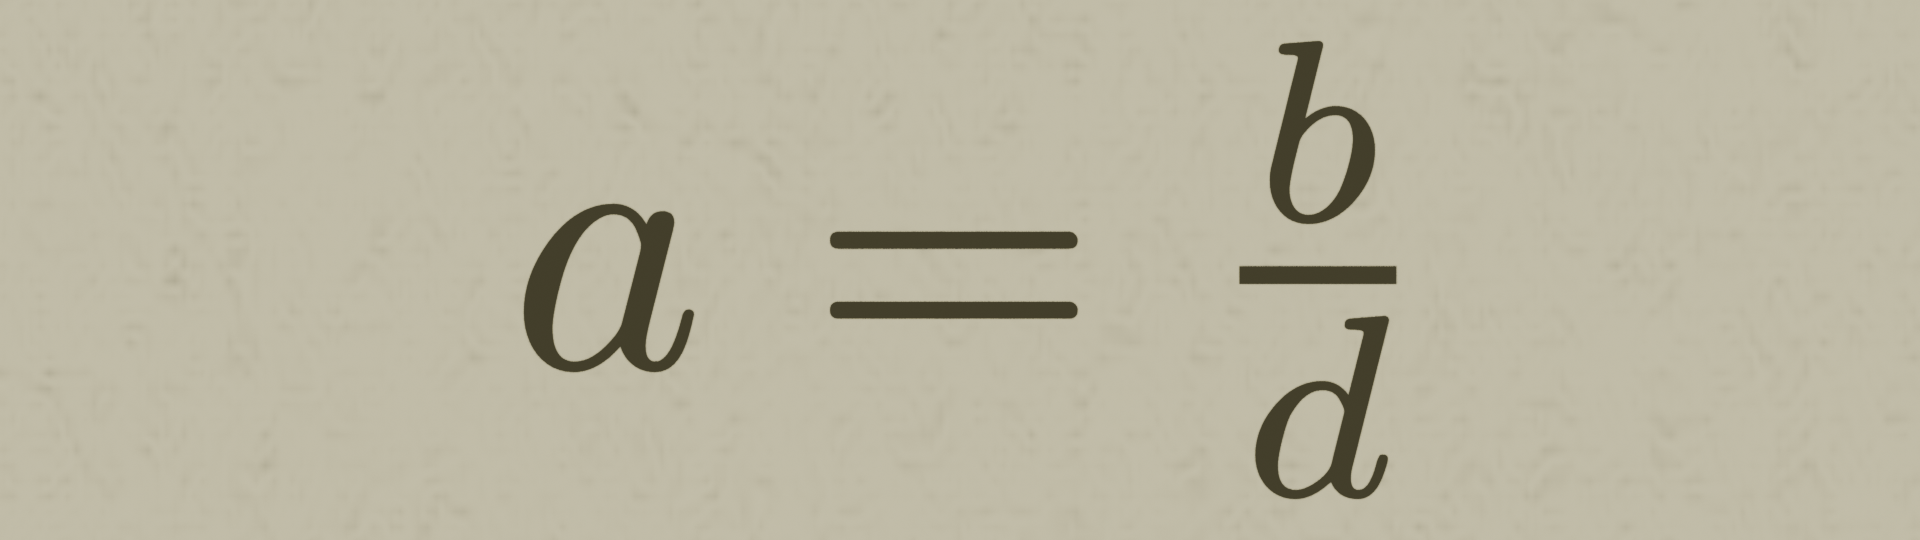

In [80]:
fresh_scene()

c = typst_express(
    "$ a = b/d$",
    scale_factor=200,
    origin_to_char=True,
    join_curves=True,
)
adjust_camera_to_collection(c)
render_result()

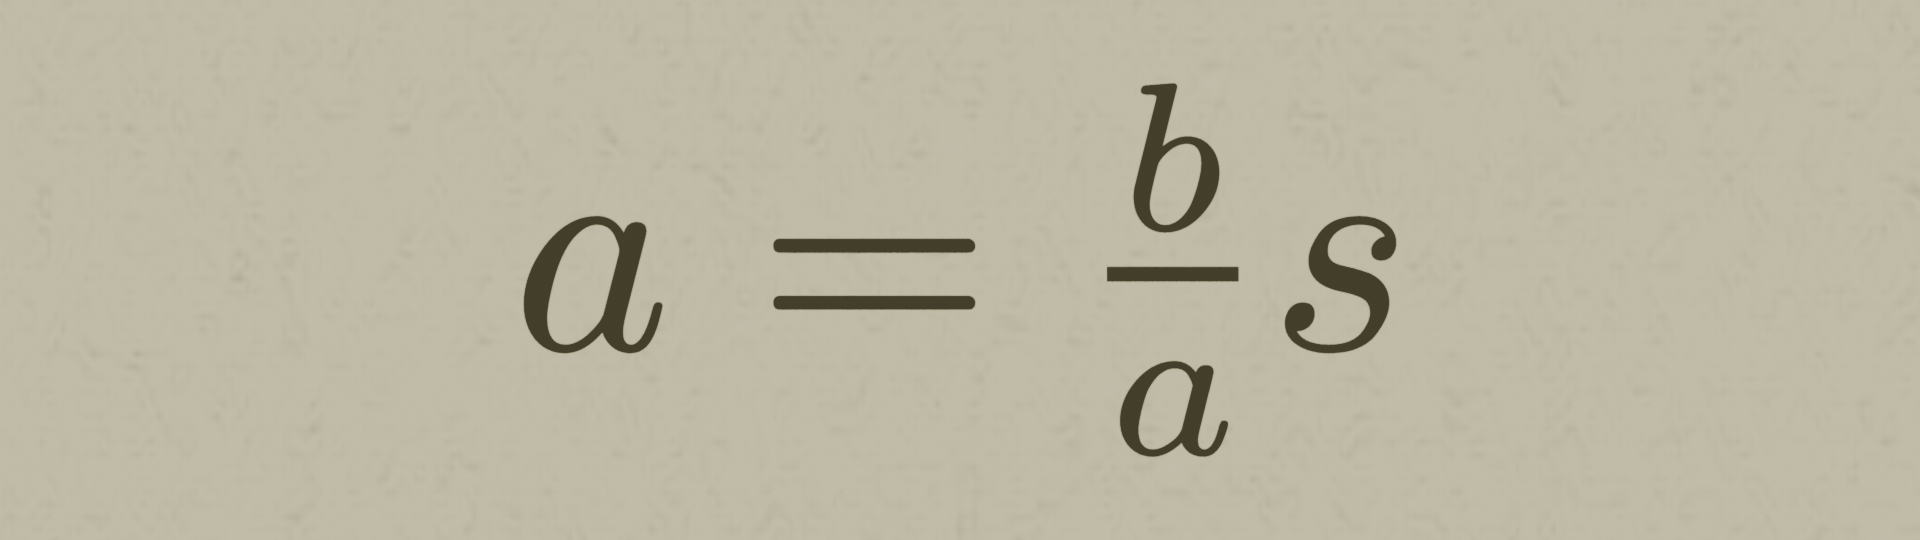

In [81]:
from typst_importer.typst_to_svg import typst_express
from typst_importer.curve_utils import shift_scene_content
fresh_scene()
c = typst_express(
    "$ a = b/a s$",
    scale_factor=200,
    origin_to_char=True,
    join_curves=True,
)
adjust_camera_to_collection(c)
render_result()

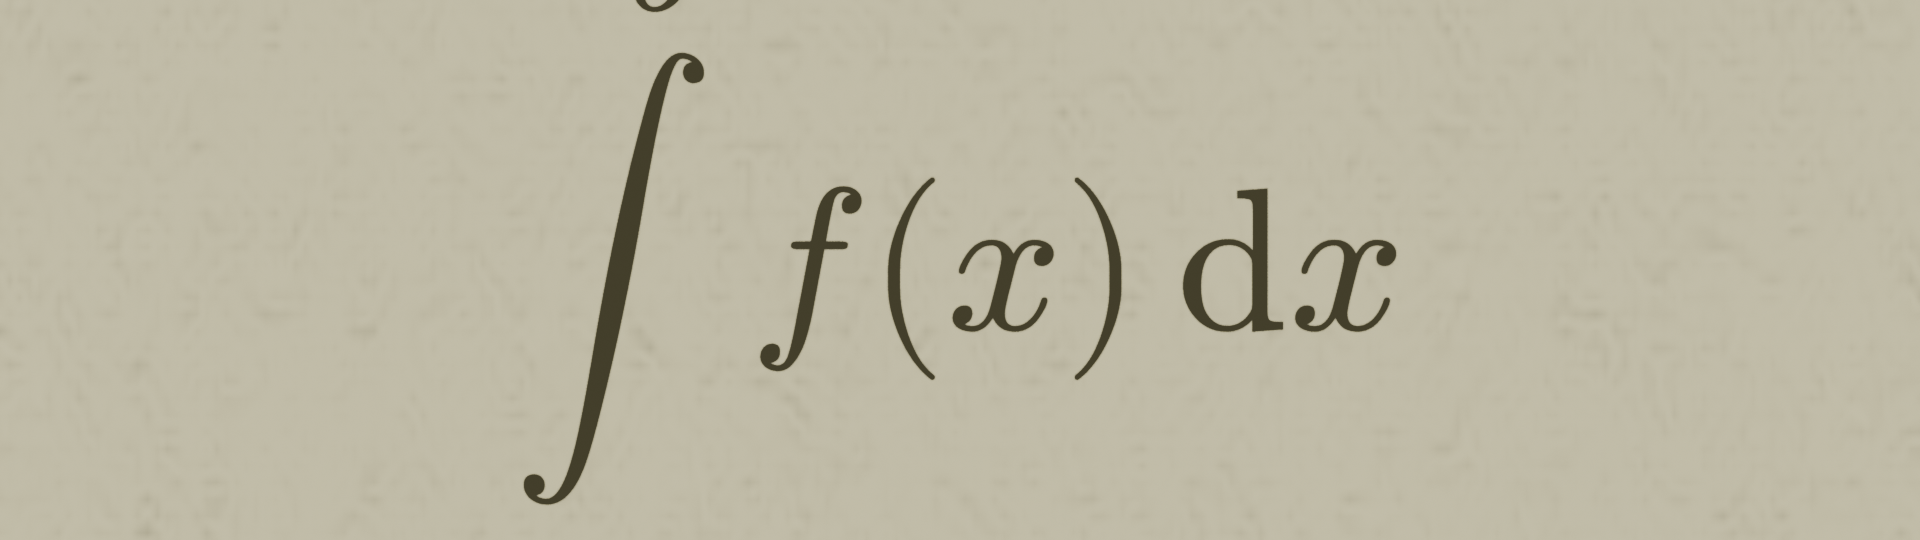

In [83]:
fresh_scene()
content = "$ limits(integral)_a^b f(x) dif x $" 
c = typst_express(content, name="Integral Example")
adjust_camera_to_collection(c, padding_factor=200)
render_result()

In [8]:
c = typst_express("""
#let korange() = text(fill: orange)[$k$]
#let nblue() = text(fill: blue)[$n$]
$ sum_(#korange() = 1)^#nblue() #korange() = (nblue()(nblue()+1)) / 2 $  
""")
shift_scene_content(c) 

In [9]:
from typst_importer.typst_to_svg import typst_express
from typst_importer.curve_utils import shift_scene_content

c = typst_express("""
#set page(width: 900pt, height: auto, margin: 0cm, fill: none)

#import "@preview/codelst:2.0.1": sourcecode
#import "@preview/tablex:0.0.8": tablex
#let sourcecode = sourcecode.with(frame: (code) => block(
  radius: 5pt,
  stroke: 2pt + luma(0),
  inset: 30pt,
  text(size: 30pt, code)
))

#sourcecode[```python
for i in range(0,10):
  print(i)
```]
""")
shift_scene_content(c, margin=1.2) 

In [10]:
content = """
#set page(width: 900pt, height: auto, margin: 0cm, fill: none)

#import "@preview/codelst:2.0.1": sourcecode
#import "@preview/tablex:0.0.8": tablex

#let sourcecode = sourcecode.with(frame: (code) => block(
  radius: 5pt,
  stroke: 5pt + luma(0),
  inset: 30pt,
  text(size: 30pt, code)
))

#sourcecode[```python

class HelloWorld:
    def __init__(self):
        self.message = "Hello, world!"

    def greet(self):
        print(self.message)

if __name__ == "__main__":
    hello = HelloWorld()
    hello.greet()
```]
"""
c = typst_express(content)
shift_scene_content(c) 

In [11]:
header = """
#set page(width: auto, height: auto, margin: 0cm, fill: none)
#set text(size: 50pt)
"""
body = "$ a = b/c $"
c = typst_express(header+body)
shift_scene_content(c) 

In [12]:
header = """
#set page(width: auto, height: auto, margin: 0cm, fill: none)
#set text(size: 50pt)
"""
body = "$ limits(integral)_a^b f(x) dif x $"
c = typst_express(header+body, scale_factor=200, origin_to_char=True)
shift_scene_content(c) 

In [13]:
content = """
#set math.lr(size: 80%)
$ integral.triple _V (nabla dot accent(F, arrow)) dif V = integral.surf_(partial V)  (accent(F, arrow) dot accent(n, arrow)) dif A $
"""
c = typst_express(content)
shift_scene_content(c) 

In [ ]:
n